In [1]:
import MiniFL as mfl
import torch
import matplotlib.pyplot as plt

In [2]:
SIZE = 512
SAMPLER = torch.distributions.Normal(0,1)
def sample_vector():
    return torch.ones(SIZE)
    # return SAMPLER.sample((SIZE,)) + torch.ones(SIZE) * 100

In [3]:
from tqdm import tqdm
import numpy as np

basic_nmse = []
decorrelated_nmse = []
correlated_nmse = []

NUM_CLIENTS = np.power(2, np.linspace(0, 7, num=10)).astype(int)

for num_clients in tqdm(NUM_CLIENTS):
    data = [sample_vector() for _ in range(num_clients)]
    eden_basic_compressors = [mfl.compressors.EdenUnbiasedCompressor(size=SIZE, bits=1, real_rotation=False, seed=0) for _ in range(num_clients)]
    eden_decorrelated_compressors = [mfl.compressors.EdenUnbiasedCompressor(size=SIZE, bits=1, real_rotation=False, seed=i) for i in range(num_clients)]
    eden_corellated_compressors = [mfl.compressors.EdenCorrelatedCompressor(size=SIZE, rank=i, world_size=num_clients, real_rotation=False, seed=0) for i in range(num_clients)]

    real = sum(data) / num_clients
    eden_basic_est = sum(eden_basic_compressor.compress(x).data for x, eden_basic_compressor in zip(data, eden_basic_compressors)) / num_clients
    eden_decorrelated_est = sum(eden_decorrelated_compressor.compress(x).data for x, eden_decorrelated_compressor in zip(data, eden_decorrelated_compressors)) / num_clients
    eden_correlated_est = sum(eden_corellated_compressor.compress(x).data for x, eden_corellated_compressor in zip(data, eden_corellated_compressors)) / num_clients

    norm = sum(torch.linalg.vector_norm(x)**2 for x in data) / num_clients

    basic_nmse.append(torch.linalg.vector_norm(real - eden_basic_est) ** 2 / norm)
    decorrelated_nmse.append(torch.linalg.vector_norm(real - eden_decorrelated_est) ** 2 / norm)
    correlated_nmse.append(torch.linalg.vector_norm(real - eden_correlated_est) ** 2 / norm)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:02<00:00,  4.50it/s]


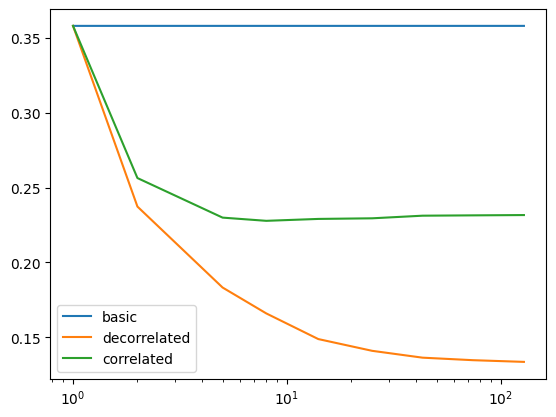

In [4]:
plt.plot(NUM_CLIENTS, basic_nmse, label='basic')
plt.plot(NUM_CLIENTS, decorrelated_nmse, label='decorrelated')
plt.plot(NUM_CLIENTS, correlated_nmse, label='correlated')


# plt.yscale('log')
plt.xscale('log')
plt.legend()

In [5]:
temp = torch.stack([eden_decorrelated_compressor.compress(x).data - x for x, eden_decorrelated_compressor in zip(data, eden_decorrelated_compressors)])

In [13]:
mean = 0

for i in range(temp.shape[0]):
    for j in range(temp.shape[0]):
        if i != j:
            prod = temp[i] @ temp[j]
            print(prod)
            mean += prod

tensor(71.6439)
tensor(77.4836)
tensor(61.7354)
tensor(70.8058)
tensor(64.6752)
tensor(59.2073)
tensor(65.8515)
tensor(62.1713)
tensor(63.1356)
tensor(67.6310)
tensor(67.4227)
tensor(58.2192)
tensor(71.3220)
tensor(74.8015)
tensor(63.0958)
tensor(69.3345)
tensor(74.2212)
tensor(66.6361)
tensor(65.7118)
tensor(61.4666)
tensor(68.9170)
tensor(71.0343)
tensor(79.3103)
tensor(73.1726)
tensor(64.8369)
tensor(71.1158)
tensor(70.4788)
tensor(69.3345)
tensor(68.8097)
tensor(64.0329)
tensor(79.2012)
tensor(63.7525)
tensor(69.5228)
tensor(67.1712)
tensor(67.2860)
tensor(73.1726)
tensor(56.1947)
tensor(52.1088)
tensor(62.5974)
tensor(59.7008)
tensor(70.5685)
tensor(69.6860)
tensor(66.8409)
tensor(73.4623)
tensor(65.5439)
tensor(72.1621)
tensor(66.4569)
tensor(71.2485)
tensor(74.4183)
tensor(62.6615)
tensor(65.8443)
tensor(70.7119)
tensor(83.8436)
tensor(64.1227)
tensor(68.3143)
tensor(74.5145)
tensor(58.0521)
tensor(68.4051)
tensor(72.1224)
tensor(65.6816)
tensor(84.8269)
tensor(68.3072)
tensor(6

In [12]:
mean

tensor(1100988.2500)